## Python version

In [1]:
from platform import python_version
print(python_version())

3.6.5


## Import Libraries

In [2]:
import numpy as np
from numpy.random import seed
seed(1)

import os
import csv
import random
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import MinMaxScaler

dtypes = {
        'IsCanceled':                                    'float64',
        'LeadTime':                                          'float64',
        'StaysInWeekendNights':                                     'float64',
        'StaysInWeekNights':                                     'float64',
        'Adults':                            'float64',
        'Children':                            'float64',
        'Babies':                                  'float64',
        'Meal':                                    'category',
        'Country':                                               'category',
        'MarketSegment':                                    'category',
        'DistributionChannel':                                       'category',
        'IsRepeatedGuest':                               'float64',
        'PreviousCancellations':                                    'float64',
        'PreviousBookingsNotCanceled':                          'float64',
        'ReservedRoomType':                                             'category',
        'AssignedRoomType':                                            'category',
        'BookingChanges':                                                'float64',
        'DepositType':                                              'category',
        'Agent':                                              'category',
        'Company':                                 'category',
        'DaysInWaitingList':                                           'float64',
        'CustomerType':                                           'category',
        'ADR':                                          'float64',
        'RequiredCarParkingSpaces':                                      'float64',
        'TotalOfSpecialRequests':                                              'float64',
        'ReservationStatus':                                                'category'
        }

/home/michael/anaconda3/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data Import and Manipulation

In [3]:
train_df = pd.read_csv('H1full.csv', dtype=dtypes, converters={'ArrivalDateWeekNumber': '{:0>2}'.format})
a=train_df.head()
b=train_df
b
c=b.sort_values(['ArrivalDateYear','ArrivalDateWeekNumber'], ascending=True)
c=pd.DataFrame(c)
c
type(c)

pandas.core.frame.DataFrame

In [4]:
from pandas import DataFrame  

df = DataFrame(c, columns= ['ArrivalDateYear', 'ArrivalDateWeekNumber']) 
df

,ArrivalDateYear,ArrivalDateWeekNumber
0,2015,27
1,2015,27
2,2015,27
3,2015,27
4,2015,27
...,...,...
40055,2017,35
40056,2017,35
40057,2017,35
40058,2017,35


In [5]:
# https://datatofish.com/concatenate-values-python/

df1 = df['ArrivalDateYear'].map(str) + df['ArrivalDateWeekNumber'].map(str)
print (df1)
df1=pd.DataFrame(df1)

0        201527
1        201527
2        201527
3        201527
4        201527
          ...  
40055    201735
40056    201735
40057    201735
40058    201735
40059    201735
Length: 40060, dtype: object


In [6]:
df2 = DataFrame(c, columns= ['IsCanceled']) 
df2

,IsCanceled
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
40055,0.0
40056,0.0
40057,0.0
40058,0.0


In [7]:
type(df1)

pandas.core.frame.DataFrame

In [8]:
df3=pd.concat([df1, df2], axis = 1)
df3
df3.columns = ['FullDate', 'IsCanceled']

In [9]:
df3
df3.sort_values(['FullDate','IsCanceled'], ascending=True)

,FullDate,IsCanceled
0,201527,0.0
1,201527,0.0
2,201527,0.0
3,201527,0.0
4,201527,0.0
...,...,...
13799,201735,1.0
13800,201735,1.0
13801,201735,1.0
13802,201735,1.0


In [10]:
df4 = df3.groupby('FullDate').agg(sum)
df4
df4.sort_values(['FullDate'], ascending=True)

,IsCanceled
FullDate,
201527,41.0
201528,48.0
201529,87.0
201530,74.0
201531,101.0
...,...
201731,173.0
201732,140.0
201733,182.0


In [11]:
tseries=df4['IsCanceled']
tseries

FullDate
201527     41.0
201528     48.0
201529     87.0
201530     74.0
201531    101.0
          ...  
201731    173.0
201732    140.0
201733    182.0
201734    143.0
201735    100.0
Name: IsCanceled, Length: 115, dtype: float64

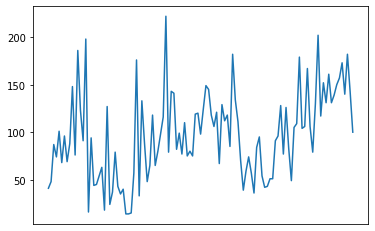

In [12]:
import matplotlib.pyplot as plt
plt.plot(tseries)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.show()

In [13]:
df=pd.DataFrame(tseries)
df

,IsCanceled
FullDate,
201527,41.0
201528,48.0
201529,87.0
201530,74.0
201531,101.0
...,...
201731,173.0
201732,140.0
201733,182.0


## Train-Test Split

In [14]:
tseriesr=pd.Series(tseries)
type(tseriesr)

# logvalue=np.log(tseriesr)
train, val = tseriesr[1:80], tseriesr[81:100]

In [15]:
type(val)

pandas.core.series.Series

In [16]:
train

FullDate
201528     48.0
201529     87.0
201530     74.0
201531    101.0
201532     68.0
          ...  
201649     74.0
201650     57.0
201651     36.0
201652     84.0
201653     95.0
Name: IsCanceled, Length: 79, dtype: float64

In [17]:
val

FullDate
201702     42.0
201703     43.0
201704     51.0
201705     51.0
201706     91.0
201707     96.0
201708    128.0
201709     77.0
201710    126.0
201711     83.0
201712     49.0
201713    105.0
201714    109.0
201715    179.0
201716    104.0
201717    106.0
201718    167.0
201719    106.0
201720     79.0
Name: IsCanceled, dtype: float64

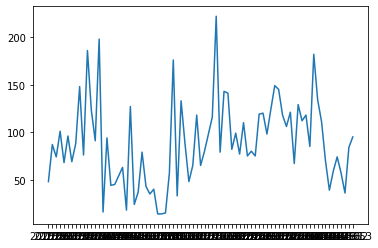

In [18]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.stattools as ts

plt.plot(train)
plt.show()

### Autocorrelation Plot

/home/michael/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


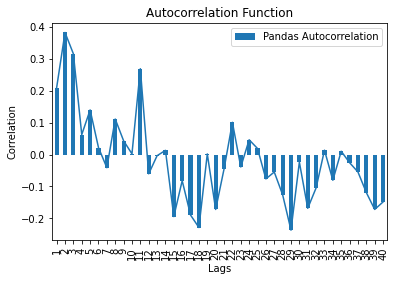

In [19]:
acf_1 =  acf(train)[1:50]
test_df = pd.DataFrame([acf_1]).T
test_df.columns = ['Pandas Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')
plt.plot(acf_1)
plt.xlabel('Lags')
plt.ylabel('Correlation')
plt.title(r'Autocorrelation Function')
plt.show()

In [20]:
acf_1

array([ 0.20931733,  0.38197312,  0.31530534,  0.0622506 ,  0.1396059 ,
        0.02172799, -0.04126991,  0.11103553,  0.04299311,  0.00205462,
        0.26860433, -0.06040052, -0.00380789,  0.0130726 , -0.19428628,
       -0.08193784, -0.18951941, -0.22849462,  0.00183862, -0.17196409,
       -0.04549428,  0.10074914, -0.03905616,  0.04614769,  0.0188279 ,
       -0.07631446, -0.05476133, -0.1257952 , -0.23682021, -0.0239377 ,
       -0.16840741, -0.10447924,  0.01352176, -0.08054517,  0.01015105,
       -0.02548999, -0.05462688, -0.11893659, -0.17193458, -0.14839724])

### Partial Autocorrelation Plot

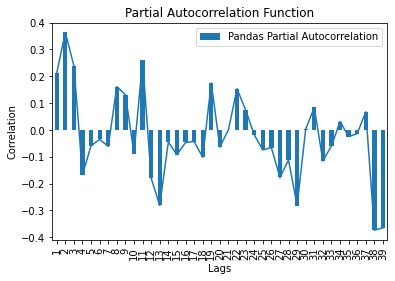

In [21]:
pacf_1 =  pacf(train)[1:40]
val_df = pd.DataFrame([pacf_1]).T
val_df.columns = ['Pandas Partial Autocorrelation']
val_df.index += 1
val_df.plot(kind='bar')
plt.plot(pacf_1)
plt.xlabel('Lags')
plt.ylabel('Correlation')
plt.title(r'Partial Autocorrelation Function')
plt.show()

In [22]:
pacf_1

array([ 0.21200088,  0.3632774 ,  0.23863976, -0.1670388 , -0.05874284,
       -0.03546263, -0.06135962,  0.1612243 ,  0.1311    , -0.08807084,
        0.25891308, -0.18031084, -0.2814698 , -0.04519587, -0.09229597,
       -0.04686845, -0.04336517, -0.10180477,  0.17450237, -0.06355372,
        0.00043641,  0.15359563,  0.07481384, -0.01768203, -0.07443292,
       -0.06589568, -0.17733184, -0.11195016, -0.28249504,  0.00292817,
        0.08378081, -0.11551819, -0.06006309,  0.03118785, -0.02486253,
       -0.0138124 ,  0.06748982, -0.37381605, -0.3650742 ])

### Dickey-Fuller Test

In [23]:
result = ts.adfuller(train)
result
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.677149
p-value: 0.078077
Critical Values:
	1%: -3.519
	5%: -2.900
	10%: -2.587


## ARIMA Model Configuration

In [24]:
# https://www.kdnuggets.com/2018/02/google-colab-free-gpu-tutorial-tensorflow-keras-pytorch.html/2
# https://pypi.org/project/pyramid-arima/
!pip install -q pyramid-arima==0.9.0

In [25]:
from pyramid.arima import auto_arima
Arima_model=auto_arima(train, start_p=0, start_q=0, max_p=10, max_q=10, start_P=0, start_Q=0, max_P=10, max_Q=10, m=52, seasonal=True, trace=True, d=1, D=1, error_action='warn', suppress_warnings=True, random_state = 20, n_fits=30)

/home/michael/.local/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/home/michael/.local/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/home/michael/anaconda3/lib/python3.6/site-packages/pyramid/__init__.py:68: UserWarning: 
    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 52); AIC=305.146, BIC=307.662, Fit time=0.382 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 0, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds


/home/michael/anaconda3/lib/python3.6/site-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 0) seasonal_order=(1, 1, 0, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/home/michael/anaconda3/lib/python3.6/site-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(0, 1, 1) seasonal_order=(0, 1, 1, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/home/michael/anaconda3/lib/python3.6/site-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(0, 1, 0) seasonal_order=(1, 1, 0, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/home/michael/anaconda3/lib/python3.6/site-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(

Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 52); AIC=292.219, BIC=295.993, Fit time=2.065 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 52); AIC=293.486, BIC=298.518, Fit time=2.021 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 0, 52); AIC=294.780, BIC=301.070, Fit time=3.745 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds


/home/michael/anaconda3/lib/python3.6/site-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 0) seasonal_order=(0, 1, 1, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/home/michael/anaconda3/lib/python3.6/site-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 0) seasonal_order=(1, 1, 1, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 0, 52); AIC=293.144, BIC=298.176, Fit time=1.924 seconds
Total fit time: 10.167 seconds


In [26]:
Arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   79
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 52)   Log Likelihood                -143.109
Date:                            Thu, 02 Apr 2020   AIC                            292.219
Time:                                    15:55:31   BIC                            295.993
Sample:                                         0   HQIC                           293.306
                                             - 79                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.4681     12.198      0.202      0.840     -21.440      26.377
ar.L1         -0.6512      0.170     -3.829      0.000      -0.985      -0.318
sigma2      3462.5541   1487.712      2.327      0.020     546.692    6378.416
===================================================================================
Ljung-Box (Q):                         nan   Jarque-Bera (JB):                 1.28
Prob(Q):                               nan   Prob(JB):                         0.53
Heteroskedasticity (H):               2.36   Skew:                            -0.02
Prob(H) (two-sided):                  0.22   Kurtosis:                         1.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
prediction=pd.DataFrame(Arima_model.predict(n_periods=19), index=val.index)
prediction.columns = ['Predicted_Cancellations']
predictions=prediction['Predicted_Cancellations']

In [28]:
prediction

,Predicted_Cancellations
FullDate,
201702,90.096060
201703,73.013262
201704,69.674854
201705,75.316832
201706,116.762288
201707,238.591520
201708,96.217367
201709,198.277974
201710,154.404319


In [29]:
val

FullDate
201702     42.0
201703     43.0
201704     51.0
201705     51.0
201706     91.0
201707     96.0
201708    128.0
201709     77.0
201710    126.0
201711     83.0
201712     49.0
201713    105.0
201714    109.0
201715    179.0
201716    104.0
201717    106.0
201718    167.0
201719    106.0
201720     79.0
Name: IsCanceled, dtype: float64

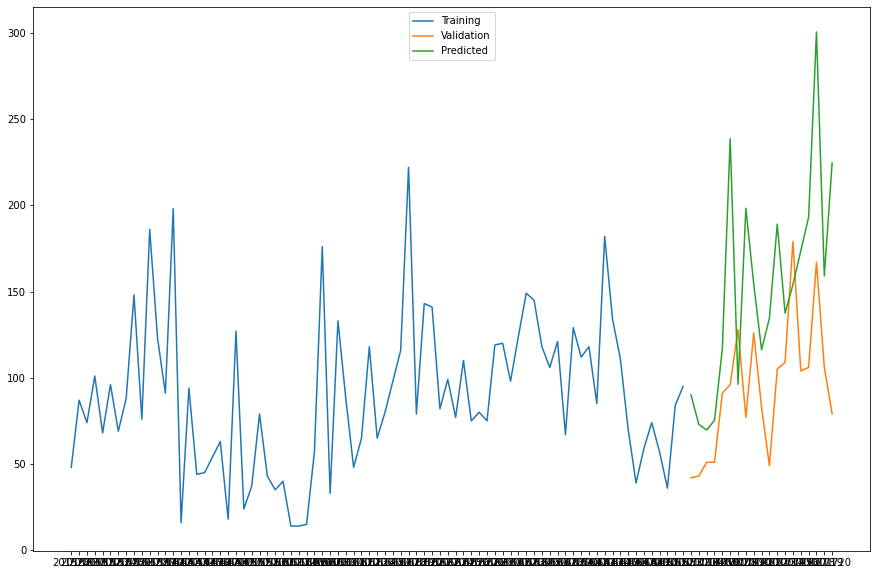

In [30]:
plt.figure(figsize=(15,10))
plt.plot(train, label='Training')
plt.plot(val, label='Validation')
plt.plot(prediction, label='Predicted')
plt.legend(loc = 'upper center')
plt.show()

In [31]:
import numpy as np

def mda(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Directional Accuracy """
    return np.mean((np.sign(actual[1:] - actual[:-1]) == np.sign(predicted[1:] - predicted[:-1])).astype(int))

In [32]:
type(predictions)

pandas.core.series.Series

In [33]:
mda(val, predictions)

0.8947368421052632

In [34]:
import math
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(val, predictions)
rmse = math.sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 77.047253


## Validate Predictions on Test Data

In [35]:
test = np.array([[130,202,117,152,131,161,131,139,150,157,173,140,182,143,100]])
test.shape

(1, 15)

In [36]:
test=test.reshape(-1)
test

array([130, 202, 117, 152, 131, 161, 131, 139, 150, 157, 173, 140, 182,
       143, 100])

In [37]:
test.shape

(15,)

In [38]:
test = pd.Series(test)

In [39]:
predictionnew=pd.DataFrame(Arima_model.predict(n_periods=15), index=test.index)
predictionnew.columns = ['Unseen_Predicted_Cancellations']
predictionsnew=predictionnew['Unseen_Predicted_Cancellations']

In [40]:
mse_new = mean_squared_error(test, predictionsnew)
rmse_new = math.sqrt(mse_new)
print('RMSE: %f' % rmse_new)

RMSE: 57.955865


In [41]:
mda(test, predictionsnew)

0.8666666666666667

In [42]:
forecast_error_new = (predictionsnew-test)
forecast_error_new

0     -39.903940
1    -128.986738
2     -47.325146
3     -76.683168
4     -14.237712
5      77.591520
6     -34.782633
7      59.277974
8       4.404319
9     -40.860980
10    -38.522416
11     49.074097
12    -44.497357
13     11.040562
14     73.507262
dtype: float64

In [43]:
mean_forecast_error_new = np.mean(forecast_error_new)
mean_forecast_error_new

-12.726957076685288

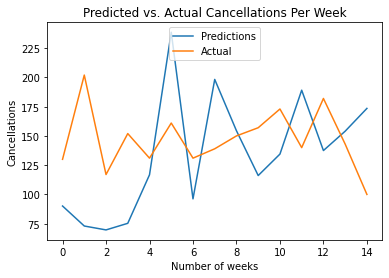

In [44]:
predictons, =plt.plot(predictionsnew, label='Predictions')
actual, =plt.plot(test, label='Actual')
plt.xlabel('Number of weeks')
plt.ylabel('Cancellations')
plt.title("Predicted vs. Actual Cancellations Per Week")
plt.legend(loc = 'upper center')
plt.show()